In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change our current working directory
import os
import shutil

# Create your own working directory then set below's value to that dir :)
os.chdir('/content/drive/MyDrive/UAS PCD/Dataset/DATASET 1')

# Data Understanding

In [ ]:
train_dir = 'TRAIN 1'
test_dir = 'TEST 1'

train_data_dict = {}
for dir in os.listdir(train_dir):
  if dir not in train_data_dict.keys():
    train_data_dict[dir] = []
  for imgfile in os.listdir(os.path.join(os.getcwd(),train_dir,dir)):
    train_data_dict[dir].append(os.path.join(os.getcwd(),train_dir,dir,imgfile))

test_data_dict = {}
for dir in os.listdir(test_dir):
  if dir not in test_data_dict.keys():
    test_data_dict[dir] = []
  for imgfile in os.listdir(os.path.join(os.getcwd(),test_dir,dir)):
    test_data_dict[dir].append(os.path.join(os.getcwd(),test_dir,dir,imgfile))

def print_data_summary(dictionary):
  for key in dictionary.keys():
    print(f"{key} -> {len(dictionary[key])}")

print("Data Train\n============")
print_data_summary(train_data_dict)
print("\nData Test\n============")
print_data_summary(test_data_dict)

Data Train
BENIGN -> 1440
MALIGNANT -> 1197

Data Test
MALIGNANT -> 300
BENIGN -> 250


# Visualisasi Data

In [ ]:
# Visualization lib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import imutils
from imutils.contours import sort_contours

<Figure size 432x288 with 0 Axes>

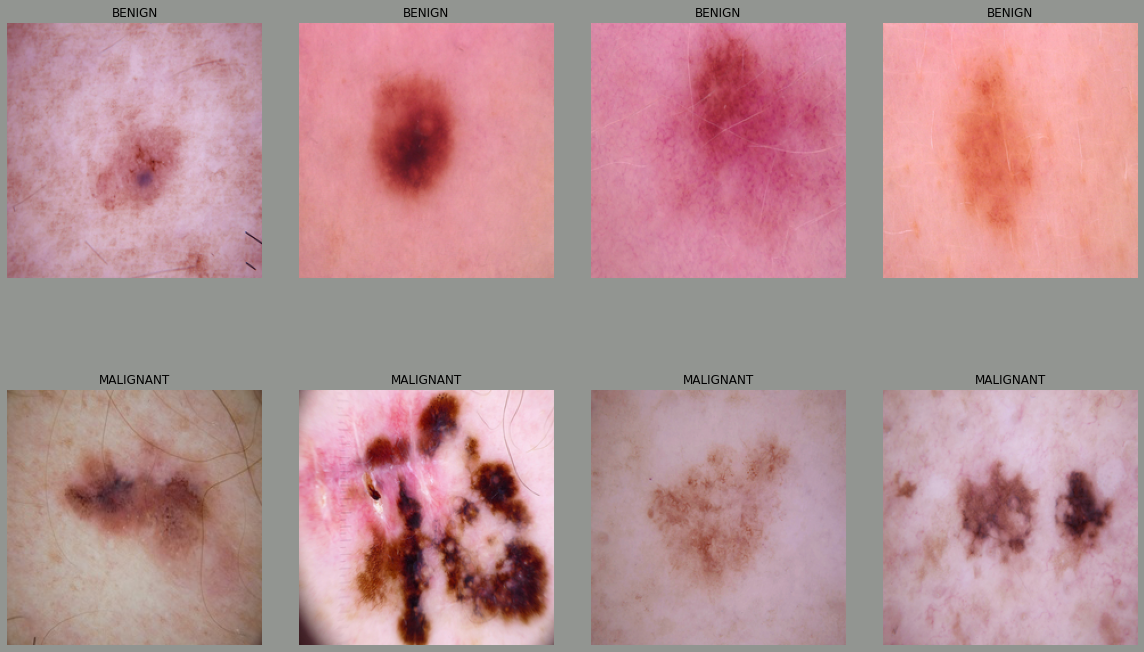

In [ ]:
image_formats = ["png", "jpg"];

def show_images(image_files):  
    plt.figure() # specifying the overall grid size
    fig = plt.figure(figsize=(16,16))
    fig.patch.set_facecolor('xkcd:gray')
    
    for i in range(len(image_files)):
        plt.subplot(3,4,i+1)    # the number of images in the grid is 5*5 (25)
        img=mpimg.imread(image_files[i])
        plt.imshow(img)
        plt.tight_layout()
        plt.axis('off')
        plt.title(image_files[i].split("/")[1]) # The name of the character
    
    plt.show()

def list_files(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        count=0
        for name in files:
            if name.endswith(".jpg") or name.endswith(".png"):
              arr.append(os.path.join(root, name))
              count=count+1
              if count == 4:  # Menampilkan 4 gambar untuk tiap kelas
                break
    return arr

image_list = list_files(train_dir)
show_images(image_list)

# Image Preprocessing

## Dull Razor Filtering

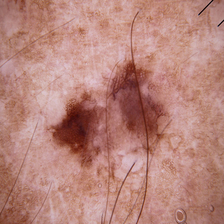

In [ ]:
image = cv2.imread(test_data_dict['MALIGNANT'][3])
cv2_imshow(image)

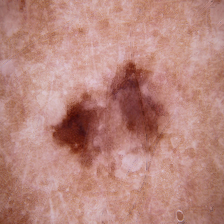

In [ ]:
def dullrazor(img, lowbound=15, showimgs=False, filterstruc=3, inpaintmat=3):
    #grayscale
    imgtmp1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #applying a blackhat
    filterSize =(filterstruc, filterstruc)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize) 
    imgtmp2 = cv2.morphologyEx(imgtmp1, cv2.MORPH_BLACKHAT, kernel)

    #0=skin and 255=hair
    ret, mask = cv2.threshold(imgtmp2, lowbound, 255, cv2.THRESH_BINARY)
    
    #inpainting
    img_final = cv2.inpaint(img, mask, inpaintmat ,cv2.INPAINT_TELEA)
    
    if showimgs:
        print("_____DULLRAZOR_____")
        plt.imshow(imgtmp1, cmap="gray")
        plt.show()
        plt.imshow(imgtmp2, cmap='gray')
        plt.show()
        plt.imshow(mask, cmap='gray')
        plt.show()
        plt.imshow(img_final)
        plt.show()
        print("___________________")

    return img_final

img = dullrazor(image)
cv2_imshow(img)

In [ ]:
train_data_dict['BENIGN'][0]

'/content/drive/MyDrive/UAS PCD/Dataset/DATASET 1/TRAIN 1/BENIGN/1472.jpg'

In [ ]:
os.getcwd()

'/content/drive/MyDrive/UAS PCD/Dataset/DATASET 1'

In [ ]:
# # Inisialisasi folder penyimpan hasil dull razor
# os.makedirs("../DATASET RAZOR/TRAIN/MALIGNANT")
# os.makedirs("../DATASET RAZOR/TRAIN/BENIGN")
# os.makedirs("../DATASET RAZOR/TEST/MALIGNANT")
# os.makedirs("../DATASET RAZOR/TEST/BENIGN")

In [ ]:
# Proses Data Train
for keys in train_data_dict.keys():
  for files in train_data_dict[keys]:
    image = cv2.imread(files) 
    img = dullrazor(image)
    cv2.imwrite('../DATASET RAZOR/TRAIN/{}/{}'.format(keys,files.split("/")[-1]), img)

# Proses Data Test
for keys in test_data_dict.keys():
  for files in test_data_dict[keys]:
    image = cv2.imread(files) 
    img = dullrazor(image)
    cv2.imwrite('../DATASET RAZOR/TEST/{}/{}'.format(keys,files.split("/")[-1]), img)

## Contrast Stretching

In [ ]:
cv2.imwrite("ano.jpg",img)

True

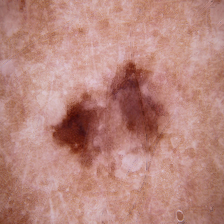

In [ ]:
# image = cv2.imread(img)
cv2_imshow(img)

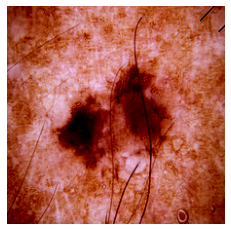

In [ ]:
# Example Python Program for contrast stretching
from PIL import Image

# Method to process the red band of the image
def normalizeRed(intensity):
    iI      = intensity
    minI    = 86
    maxI    = 230
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# Method to process the green band of the image
def normalizeGreen(intensity):
    iI      = intensity
    minI    = 90
    maxI    = 225
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# Method to process the blue band of the image
def normalizeBlue(intensity):
    iI      = intensity
    minI    = 100
    maxI    = 210
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# Create an image object
imageObject     = Image.open('malignant.jog')

# Split the red, green and blue bands from the Image
multiBands      = imageObject.split()

# Apply point operations that does contrast stretching on each color band
normalizedRedBand      = multiBands[0].point(normalizeRed)
normalizedGreenBand    = multiBands[1].point(normalizeGreen)
normalizedBlueBand     = multiBands[2].point(normalizeBlue)

# Create a new image from the contrast stretched red, green and blue brands
normalizedImage = Image.merge("RGB", (normalizedRedBand, 
                                      normalizedGreenBand, 
                                      normalizedBlueBand))

# Display the image before contrast stretching
# plt.imshow(imageObject)

# Display the image after contrast stretching
# cv2.imwrite('gambar.jpg', normalizedImage)
plt.imshow
plt.axis('off')
plt.imshow(normalizedImage)
normalizedImage.save("gambar.jpg")

In [ ]:
# # Inisialisasi folder penyimpan hasil cs
# os.makedirs("../DATASET CONTRAST/TRAIN/MALIGNANT")
# os.makedirs("../DATASET CONTRAST/TRAIN/BENIGN")
# os.makedirs("../DATASET CONTRAST/TEST/MALIGNANT")
# os.makedirs("../DATASET CONTRAST/TEST/BENIGN")

In [ ]:
os.getcwd()

'/content/drive/MyDrive/UAS PCD/Dataset/DATASET 1'

In [ ]:
# LIST DATA YANG MAU DIUBAH
processed_train_dir = '../DATASET RAZOR/TRAIN'
processed_test_dir = '../DATASET RAZOR/TEST'

train_razored_data_dict = {}
for dir in os.listdir(processed_train_dir):
  if dir not in train_razored_data_dict.keys():
    train_razored_data_dict[dir] = []
  for imgfile in os.listdir(os.path.join(processed_train_dir,dir)):
    train_razored_data_dict[dir].append(os.path.join(processed_train_dir,dir,imgfile))

test_razored_data_dict = {}
for dir in os.listdir(processed_test_dir):
  if dir not in test_razored_data_dict.keys():
    test_razored_data_dict[dir] = []
  for imgfile in os.listdir(os.path.join(processed_test_dir,dir)):
    test_razored_data_dict[dir].append(os.path.join(processed_test_dir,dir,imgfile))

def print_data_summary(dictionary):
  for key in dictionary.keys():
    print(f"{key} -> {len(dictionary[key])}")

print("Data Train\n============")
print_data_summary(train_razored_data_dict)
print("\nData Test\n============")
print_data_summary(test_razored_data_dict)

Data Train
MALIGNANT -> 1197
BENIGN -> 1440

Data Test
MALIGNANT -> 300
BENIGN -> 250


In [ ]:
# Proses Data Train
for keys in train_razored_data_dict.keys():
  for files in train_razored_data_dict[keys]:
    imageObject     = Image.open(files)
    multiBands      = imageObject.split()
    normalizedRedBand      = multiBands[0].point(normalizeRed)
    normalizedGreenBand    = multiBands[1].point(normalizeGreen)
    normalizedBlueBand     = multiBands[2].point(normalizeBlue)
    normalizedImage = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))
    normalizedImage.save('/content/drive/MyDrive/UAS PCD/Dataset/DATASET CONTRAST/TRAIN/{}/{}'.format(keys,files.split("/")[-1]))

# Proses Data Test
for keys in test_razored_data_dict.keys():
  for files in test_razored_data_dict[keys]:
    imageObject     = Image.open(files)
    multiBands      = imageObject.split()
    normalizedRedBand      = multiBands[0].point(normalizeRed)
    normalizedGreenBand    = multiBands[1].point(normalizeGreen)
    normalizedBlueBand     = multiBands[2].point(normalizeBlue)
    normalizedImage = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))
    normalizedImage.save('/content/drive/MyDrive/UAS PCD/Dataset/DATASET CONTRAST/TEST/{}/{}'.format(keys,files.split("/")[-1]))


## CLAHE

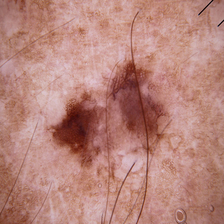

In [ ]:
image = cv2.imread(test_data_dict['MALIGNANT'][3])
cv2_imshow(image)

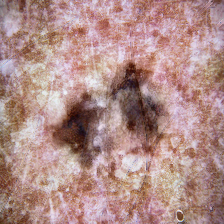

In [ ]:
def clahe(img):
    #grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # We first create a CLAHE model based on OpenCV
    # clipLimit defines threshold to limit the contrast in case of noise in our image
    # tileGridSize defines the area size in which local equalization will be performed
    clahe = cv2.createCLAHE(clipLimit=2.0,
    tileGridSize=(8,8))

    # For ease of understanding, we explicitly equalize each channel individually
    colorimage_b = clahe.apply(img[:,:,0])
    colorimage_g = clahe.apply(img[:,:,1])
    colorimage_r = clahe.apply(img[:,:,2])

    colorimage_clahe = np.stack((colorimage_b,colorimage_g,colorimage_r), axis=2)
    return colorimage_clahe

img = clahe(img)
cv2_imshow(img)

In [ ]:
# # Inisialisasi folder penyimpan hasil cs
# os.makedirs("../DATASET CLAHE1/TRAIN/MALIGNANT")
# os.makedirs("../DATASET CLAHE1/TRAIN/BENIGN")
# os.makedirs("../DATASET CLAHE1/TEST/MALIGNANT")
# os.makedirs("../DATASET CLAHE1/TEST/BENIGN")

In [ ]:
os.getcwd()

'/content/drive/MyDrive/UAS PCD/Dataset/DATASET 1'

In [ ]:
# LIST DATA YANG MAU DIUBAH
processed_train_dir = '../DATASET RAZOR/TRAIN'
processed_test_dir = '../DATASET RAZOR/TEST'

train_razored_data_dict = {}
for dir in os.listdir(processed_train_dir):
  if dir not in train_razored_data_dict.keys():
    train_razored_data_dict[dir] = []
  for imgfile in os.listdir(os.path.join(processed_train_dir,dir)):
    train_razored_data_dict[dir].append(os.path.join(processed_train_dir,dir,imgfile))

test_razored_data_dict = {}
for dir in os.listdir(processed_test_dir):
  if dir not in test_razored_data_dict.keys():
    test_razored_data_dict[dir] = []
  for imgfile in os.listdir(os.path.join(processed_test_dir,dir)):
    test_razored_data_dict[dir].append(os.path.join(processed_test_dir,dir,imgfile))

def print_data_summary(dictionary):
  for key in dictionary.keys():
    print(f"{key} -> {len(dictionary[key])}")

print("Data Train\n============")
print_data_summary(train_razored_data_dict)
print("\nData Test\n============")
print_data_summary(test_razored_data_dict)

Data Train
MALIGNANT -> 1197
BENIGN -> 1440

Data Test
MALIGNANT -> 300
BENIGN -> 250


In [ ]:
# Proses Data Train
for keys in train_razored_data_dict.keys():
  for files in train_razored_data_dict[keys]:
    image = cv2.imread(files) 
    img = clahe(image)
    cv2.imwrite('../DATASET CLAHE1/TRAIN/{}/{}'.format(keys,files.split("/")[-1]), img)

# Proses Data Test
for keys in test_razored_data_dict.keys():
  for files in test_razored_data_dict[keys]:
    image = cv2.imread(files) 
    img = clahe(image)
    cv2.imwrite('../DATASET CLAHE1/TEST/{}/{}'.format(keys,files.split("/")[-1]), img)

In [ ]:
import shutil
shutil.make_archive('Dataset CLAHE', 'zip', '/content/drive/MyDrive/UAS PCD/Dataset/DATASET CLAHE1')

# Segmentation

In [ ]:
from skimage import io, exposure, morphology, filters, color, \
                    segmentation, feature, measure, img_as_float, img_as_ubyte
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from scipy import ndimage as ndi


## Region-based Segmentation

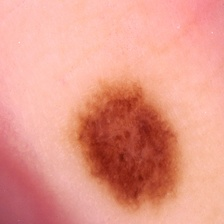

In [ ]:
image = cv2.imread("../DATASET RAZOR/TRAIN/BENIGN/1550.jpg")
image = dullrazor(image)
cv2_imshow(image)

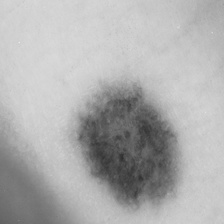

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

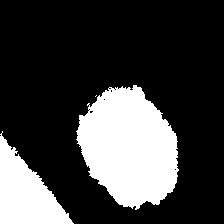

In [ ]:
value, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(thresh)

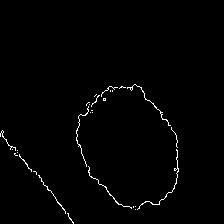

In [ ]:
med = np.median(gray)
lower = int(max(0,0.7*med))
upper = int(min(255,1.3*med))
edges = cv2.Canny(thresh, lower, upper)

# edges = cv2.Canny(thresh, 50, 150)
cv2_imshow(edges)

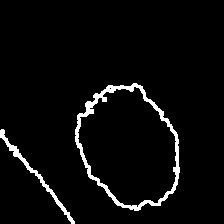

In [ ]:
dilation = cv2.dilate(edges, np.ones((3,3)))
cv2_imshow(dilation)

In [ ]:
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method = 'left-to-right')[0]
  return conts

conts = find_contours(dilation.copy())

0 129 75 95


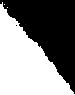

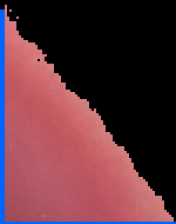

(224, 176, 3)
75 83 105 128


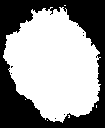

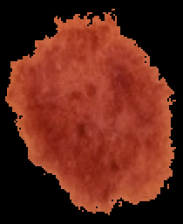

(224, 183, 3)


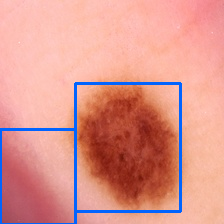

In [ ]:
min_w, max_w = 55, 240
min_h, max_h = 55, 240

for c in conts:
  #print(c)
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    print(x, y, w, h)
    roi = gray[y:y+h, x:x+w]
    #cv2_imshow(roi)
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh)
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 100, 0), 2)

    res = cv2.bitwise_and(image[y:y+h, x:x+w], image[y:y+h, x:x+w], mask = thresh)
    res = imutils.resize(res, height = 224)
    cv2_imshow(res)
    print(res.shape)
    
cv2_imshow(image)

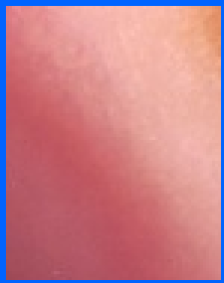

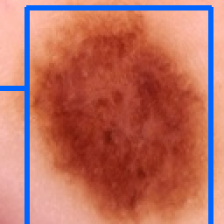

In [ ]:
# Extract Range of Interest (ROI)
def extract_roi(img,x,y,w,h):
  roi = img[y:y + h, x:x + w,:]
  return roi

#Thresholding
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  return thresh

#Resize the Image
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width = 120)
  else:
    resized = imutils.resize(img, height = 120)

  (h, w) = resized.shape
  dX = int(max(0, 120 - w) / 2.0)
  dY = int(max(0, 120 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value = (0,0,0))
  filled = cv2.resize(filled, (120,120))
  return filled

def normalization(img):
  img = img.astype('float32') / 255.0
  img = np.expand_dims(img, axis = -1)
  return img

# def process_box(img, x, y, w, h):
#   # characters = []
#   roi = extract_roi(img,x,y,w,h)
#   # thresh = thresholding(roi)
#   # (h, w) = thresh.shape
#   # resized = resize_img(thresh, w, h)
#   roi = imutils.resize(roi, width = 224)
#   cv2_imshow(roi)
#   print(roi.shape)
#   # normalized = normalization(resized)
#   # characters.append((normalized, (x, y, w, h)))

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)

  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    try:
      border = 2
      if h>w:
        x_new = x - int(0.5*(h-w))
        x_new = x_new - 2*border
        y_new = y - 2*border
      else:
        y_new = y - int(0.5*(w-h))
        y_new = y_new - 2*border
        x_new = x - 2*border

      size = max(w,h)

      w_new = h_new = size
      img = process_box(image, x_new, y_new, w_new, h_new)
      cv2_imshow(img)
    except:
      img = process_box(image, x, y, w, h)
      cv2_imshow(img)

## Segmentasi berdasarkan tepi, latar hitam

In [ ]:
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method = 'left-to-right')[0]
  return conts
  
# Extract Range of Interest (ROI)
def extract_roi(img,x,y,w,h):
  roi = img[y:y + h, x:x + w,:]
  return roi

#Thresholding
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  return thresh

#Resize the Image
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width = 120)
  else:
    resized = imutils.resize(img, height = 120)

  (h, w) = resized.shape
  dX = int(max(0, 120 - w) / 2.0)
  dY = int(max(0, 120 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value = (0,0,0))
  filled = cv2.resize(filled, (120,120))
  return filled

def normalization(img):
  img = img.astype('float32') / 255.0
  img = np.expand_dims(img, axis = -1)
  return img

def process_box(img, x, y, w, h):
  roi = extract_roi(img,x,y,w,h)
  roi = imutils.resize(roi, width = 224)
  return roi

Gambar Asli


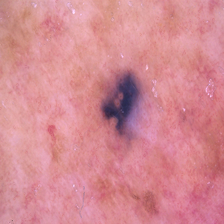

Hasil Segmentasi


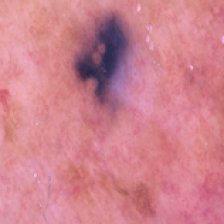

In [ ]:
image = cv2.imread(test_data_dict['BENIGN'][6])
image = dullrazor(image)
print("Gambar Asli\n==========================================")
cv2_imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

lower = int(max(0,0.7*med))
upper = int(min(255,1.3*med))
edges = cv2.Canny(thresh, lower, upper)

# dilatate the image
processed_image = cv2.dilate(edges, np.ones((3,3)))

conts = find_contours(processed_image)

print("Hasil Segmentasi\n==========================================")
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)

  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    try:
      border = 2
      if h>w:
        x_new = x - int(0.5*(h-w))
        x_new = x_new - 2*border
        y_new = y - 2*border
      else:
        y_new = y - int(0.5*(w-h))
        y_new = y_new - 2*border
        x_new = x - 2*border

      size = max(w,h)

      w_new = h_new = size #+ 4*border
      img = process_box(image, x_new, y_new, w_new, h_new)
      cv2_imshow(img)
    except:
      process_box(image, x, y, w, h)

In [ ]:
# # Inisialisasi folder penyimpan hasil cs
# os.makedirs("../DATASET SEGMEN/TRAIN/MALIGNANT")
# os.makedirs("../DATASET SEGMEN/TRAIN/BENIGN")
# os.makedirs("../DATASET SEGMEN/TEST/MALIGNANT")
# os.makedirs("../DATASET SEGMEN/TEST/BENIGN")

In [ ]:
# LIST DATA YANG MAU DIUBAH
processed_train_dir = '../DATASET RAZOR/TRAIN'
processed_test_dir = '../DATASET RAZOR/TEST'

train_razored_data_dict = {}
for dir in os.listdir(processed_train_dir):
  if dir not in train_razored_data_dict.keys():
    train_razored_data_dict[dir] = []
  for imgfile in os.listdir(os.path.join(processed_train_dir,dir)):
    train_razored_data_dict[dir].append(os.path.join(processed_train_dir,dir,imgfile))

test_razored_data_dict = {}
for dir in os.listdir(processed_test_dir):
  if dir not in test_razored_data_dict.keys():
    test_razored_data_dict[dir] = []
  for imgfile in os.listdir(os.path.join(processed_test_dir,dir)):
    test_razored_data_dict[dir].append(os.path.join(processed_test_dir,dir,imgfile))

def print_data_summary(dictionary):
  for key in dictionary.keys():
    print(f"{key} -> {len(dictionary[key])}")

print("Data Train\n============")
print_data_summary(train_razored_data_dict)
print("\nData Test\n============")
print_data_summary(test_razored_data_dict)

Data Train
BENIGN -> 1440
MALIGNANT -> 1197

Data Test
MALIGNANT -> 300
BENIGN -> 250


In [ ]:
# Proses Data Train
for keys in train_razored_data_dict.keys():
  for files in train_razored_data_dict[keys]:
    print(files)
    image = cv2.imread(files) 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    lower = int(max(0,0.7*med))
    upper = int(min(255,1.3*med))
    edges = cv2.Canny(thresh, lower, upper)

    # dilatate the image
    processed_image = cv2.dilate(edges, np.ones((3,3)))

    conts = find_contours(processed_image)

    for c in conts:
      (x, y, w, h) = cv2.boundingRect(c)

      if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
        try:
          border = 2
          if h>w:
            x_new = x - int(0.5*(h-w))
            x_new = x_new - 2*border
            y_new = y - 2*border
          else:
            y_new = y - int(0.5*(w-h))
            y_new = y_new - 2*border
            x_new = x - 2*border

          size = max(w,h)

          w_new = h_new = size
          img = process_box(image, x_new, y_new, w_new, h_new)
          cv2.imwrite('../DATASET SEGMEN/TRAIN/{}/{}'.format(keys,files.split("/")[-1]), img)
        except:
          img = process_box(image, x, y, w, h)
          cv2.imwrite('../DATASET SEGMEN/TRAIN/{}/{}'.format(keys,files.split("/")[-1]), img)

# Proses Data Test
for keys in test_razored_data_dict.keys():
  for files in test_razored_data_dict[keys]:
    image = cv2.imread(files) 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    lower = int(max(0,0.7*med))
    upper = int(min(255,1.3*med))
    edges = cv2.Canny(thresh, lower, upper)

    # dilatate the image
    processed_image = cv2.dilate(edges, np.ones((3,3)))

    conts = find_contours(processed_image)

    for c in conts:
      (x, y, w, h) = cv2.boundingRect(c)

      if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
        try:
          border = 2
          if h>w:
            x_new = x - int(0.5*(h-w))
            x_new = x_new - 2*border
            y_new = y - 2*border
          else:
            y_new = y - int(0.5*(w-h))
            y_new = y_new - 2*border
            x_new = x - 2*border

          size = max(w,h)

          w_new = h_new = size
          img = process_box(image, x_new, y_new, w_new, h_new)
          cv2.imwrite('../DATASET SEGMEN/TEST/{}/{}'.format(keys,files.split("/")[-1]), img)
        except:
          img = process_box(image, x, y, w, h)
          cv2.imwrite('../DATASET SEGMEN/TEST/{}/{}'.format(keys,files.split("/")[-1]), img)

../DATASET RAZOR/TRAIN/BENIGN/641.jpg
../DATASET RAZOR/TRAIN/BENIGN/269.jpg
../DATASET RAZOR/TRAIN/BENIGN/1550.jpg
../DATASET RAZOR/TRAIN/BENIGN/1037.jpg
../DATASET RAZOR/TRAIN/BENIGN/32.jpg
../DATASET RAZOR/TRAIN/BENIGN/870.jpg
../DATASET RAZOR/TRAIN/BENIGN/836.jpg
../DATASET RAZOR/TRAIN/BENIGN/1726.jpg
../DATASET RAZOR/TRAIN/BENIGN/1455.jpg
../DATASET RAZOR/TRAIN/BENIGN/194.jpg
../DATASET RAZOR/TRAIN/BENIGN/1486.jpg
../DATASET RAZOR/TRAIN/BENIGN/155.jpg
../DATASET RAZOR/TRAIN/BENIGN/439.jpg
../DATASET RAZOR/TRAIN/BENIGN/58.jpg
../DATASET RAZOR/TRAIN/BENIGN/521.jpg
../DATASET RAZOR/TRAIN/BENIGN/576.jpg
../DATASET RAZOR/TRAIN/BENIGN/1305.jpg
../DATASET RAZOR/TRAIN/BENIGN/1065.jpg
../DATASET RAZOR/TRAIN/BENIGN/1049.jpg
../DATASET RAZOR/TRAIN/BENIGN/760.jpg
../DATASET RAZOR/TRAIN/BENIGN/1064.jpg
../DATASET RAZOR/TRAIN/BENIGN/1392.jpg
../DATASET RAZOR/TRAIN/BENIGN/910.jpg
../DATASET RAZOR/TRAIN/BENIGN/288.jpg
../DATASET RAZOR/TRAIN/BENIGN/130.jpg
../DATASET RAZOR/TRAIN/BENIGN/66.jpg
../DA

In [ ]:
import shutil
shutil.make_archive('Dataset RAZOR', 'zip', '/content/drive/MyDrive/UAS PCD/Dataset/DATASET RAZOR')

'/content/drive/MyDrive/UAS PCD/Dataset/DATASET 1/Dataset RAZOR.zip'

Gambar Asli


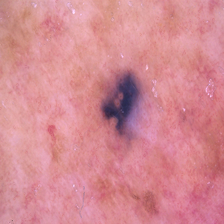

Hasil Segmentasi


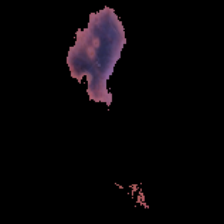

In [ ]:
image = cv2.imread(test_data_dict['BENIGN'][6])
image = dullrazor(image)
print("Gambar Asli\n==========================================")
cv2_imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

lower = int(max(0,0.7*med))
upper = int(min(255,1.3*med))
edges = cv2.Canny(thresh, lower, upper)

# dilatate the image
processed_image = cv2.dilate(edges, np.ones((3,3)))

conts = find_contours(processed_image)

print("Hasil Segmentasi\n==========================================")
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)

  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    roi = gray[y:y+h, x:x+w]
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    res = cv2.bitwise_and(image[y:y+h, x:x+w], image[y:y+h, x:x+w], mask = thresh)

    border_v = 0
    border_h = 0
    IMG_COL , IMG_ROW = 224, 224
    if (IMG_COL/IMG_ROW) >= (res.shape[0]/res.shape[1]):
        border_v = int((((IMG_COL/IMG_ROW)*res.shape[1])-res.shape[0])/2)
    else:
        border_h = int((((IMG_ROW/IMG_COL)*res.shape[0])-res.shape[1])/2)
    img = cv2.copyMakeBorder(res, border_v, border_v, border_h, border_h, cv2.BORDER_CONSTANT, 0)
    img = cv2.resize(img, (IMG_ROW, IMG_COL))

    cv2_imshow(img)


In [ ]:
# # Inisialisasi folder penyimpan hasil cs
# os.makedirs("../DATASET SEGMEN-HITAM/TRAIN/MALIGNANT")
# os.makedirs("../DATASET SEGMEN-HITAM/TRAIN/BENIGN")
# os.makedirs("../DATASET SEGMEN-HITAM/TEST/MALIGNANT")
# os.makedirs("../DATASET SEGMEN-HITAM/TEST/BENIGN")

In [ ]:
# LIST DATA YANG MAU DIUBAH
processed_train_dir = '../DATASET RAZOR/TRAIN'
processed_test_dir = '../DATASET RAZOR/TEST'

train_razored_data_dict = {}
for dir in os.listdir(processed_train_dir):
  if dir not in train_razored_data_dict.keys():
    train_razored_data_dict[dir] = []
  for imgfile in os.listdir(os.path.join(processed_train_dir,dir)):
    train_razored_data_dict[dir].append(os.path.join(processed_train_dir,dir,imgfile))

test_razored_data_dict = {}
for dir in os.listdir(processed_test_dir):
  if dir not in test_razored_data_dict.keys():
    test_razored_data_dict[dir] = []
  for imgfile in os.listdir(os.path.join(processed_test_dir,dir)):
    test_razored_data_dict[dir].append(os.path.join(processed_test_dir,dir,imgfile))

def print_data_summary(dictionary):
  for key in dictionary.keys():
    print(f"{key} -> {len(dictionary[key])}")

print("Data Train\n============")
print_data_summary(train_razored_data_dict)
print("\nData Test\n============")
print_data_summary(test_razored_data_dict)

Data Train
BENIGN -> 1440
MALIGNANT -> 1197

Data Test
MALIGNANT -> 300
BENIGN -> 250


In [ ]:
# Proses Data Train
for keys in train_razored_data_dict.keys():
  for files in train_razored_data_dict[keys]:
    print(files)
    image = cv2.imread(files) 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    lower = int(max(0,0.7*med))
    upper = int(min(255,1.3*med))
    edges = cv2.Canny(thresh, lower, upper)

    # dilatate the image
    processed_image = cv2.dilate(edges, np.ones((3,3)))

    conts = find_contours(processed_image)

    for c in conts:
      (x, y, w, h) = cv2.boundingRect(c)

      if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
        roi = gray[y:y+h, x:x+w]
        thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        res = cv2.bitwise_and(image[y:y+h, x:x+w], image[y:y+h, x:x+w], mask = thresh)

        border_v = 0
        border_h = 0
        IMG_COL , IMG_ROW = 224, 224
        if (IMG_COL/IMG_ROW) >= (res.shape[0]/res.shape[1]):
            border_v = int((((IMG_COL/IMG_ROW)*res.shape[1])-res.shape[0])/2)
        else:
            border_h = int((((IMG_ROW/IMG_COL)*res.shape[0])-res.shape[1])/2)
        img = cv2.copyMakeBorder(res, border_v, border_v, border_h, border_h, cv2.BORDER_CONSTANT, 0)
        img = cv2.resize(img, (IMG_ROW, IMG_COL))

        cv2.imwrite('../DATASET SEGMEN-HITAM/TRAIN/{}/{}'.format(keys,files.split("/")[-1]), img)

# Proses Data Test
for keys in test_razored_data_dict.keys():
  for files in test_razored_data_dict[keys]:
    image = cv2.imread(files) 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    lower = int(max(0,0.7*med))
    upper = int(min(255,1.3*med))
    edges = cv2.Canny(thresh, lower, upper)

    # dilatate the image
    processed_image = cv2.dilate(edges, np.ones((3,3)))

    conts = find_contours(processed_image)

    for c in conts:
      (x, y, w, h) = cv2.boundingRect(c)

      if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
          roi = gray[y:y+h, x:x+w]
          thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
          res = cv2.bitwise_and(image[y:y+h, x:x+w], image[y:y+h, x:x+w], mask = thresh)

          border_v = 0
          border_h = 0
          IMG_COL , IMG_ROW = 224, 224
          if (IMG_COL/IMG_ROW) >= (res.shape[0]/res.shape[1]):
              border_v = int((((IMG_COL/IMG_ROW)*res.shape[1])-res.shape[0])/2)
          else:
              border_h = int((((IMG_ROW/IMG_COL)*res.shape[0])-res.shape[1])/2)
          img = cv2.copyMakeBorder(res, border_v, border_v, border_h, border_h, cv2.BORDER_CONSTANT, 0)
          img = cv2.resize(img, (IMG_ROW, IMG_COL))
          cv2.imwrite('../DATASET SEGMEN-HITAM/TEST/{}/{}'.format(keys,files.split("/")[-1]), img)

../DATASET RAZOR/TRAIN/BENIGN/641.jpg
../DATASET RAZOR/TRAIN/BENIGN/269.jpg
../DATASET RAZOR/TRAIN/BENIGN/1550.jpg
../DATASET RAZOR/TRAIN/BENIGN/1037.jpg
../DATASET RAZOR/TRAIN/BENIGN/32.jpg
../DATASET RAZOR/TRAIN/BENIGN/870.jpg
../DATASET RAZOR/TRAIN/BENIGN/836.jpg
../DATASET RAZOR/TRAIN/BENIGN/1726.jpg
../DATASET RAZOR/TRAIN/BENIGN/1455.jpg
../DATASET RAZOR/TRAIN/BENIGN/194.jpg
../DATASET RAZOR/TRAIN/BENIGN/1486.jpg
../DATASET RAZOR/TRAIN/BENIGN/155.jpg
../DATASET RAZOR/TRAIN/BENIGN/439.jpg
../DATASET RAZOR/TRAIN/BENIGN/58.jpg
../DATASET RAZOR/TRAIN/BENIGN/521.jpg
../DATASET RAZOR/TRAIN/BENIGN/576.jpg
../DATASET RAZOR/TRAIN/BENIGN/1305.jpg
../DATASET RAZOR/TRAIN/BENIGN/1065.jpg
../DATASET RAZOR/TRAIN/BENIGN/1049.jpg
../DATASET RAZOR/TRAIN/BENIGN/760.jpg
../DATASET RAZOR/TRAIN/BENIGN/1064.jpg
../DATASET RAZOR/TRAIN/BENIGN/1392.jpg
../DATASET RAZOR/TRAIN/BENIGN/910.jpg
../DATASET RAZOR/TRAIN/BENIGN/288.jpg
../DATASET RAZOR/TRAIN/BENIGN/130.jpg
../DATASET RAZOR/TRAIN/BENIGN/66.jpg
../DA

In [ ]:
import shutil
shutil.make_archive('Dataset SEGMEN-HITAM', 'zip', '/content/drive/MyDrive/UAS PCD/Dataset/DATASET SEGMEN-HITAM')

'/content/drive/MyDrive/UAS PCD/Dataset/DATASET 1/Dataset SEGMEN-HITAM.zip'

# Feature Extraction

# Classification

In [ ]:
import keras
import tensorflow as tf

from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten

import cv2 
import numpy as np 
from keras import backend as K 
from keras.utils import np_utils

import math 
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

import datetime

## Data Preparation

In [ ]:
IMAGE_SIZE = (64,64)
TRAIN_DIR = "/content/drive/MyDrive/UAS PCD/Dataset/DATASET RAZOR/TRAIN"
TEST_DIR = "/content/drive/MyDrive/UAS PCD/Dataset/DATASET RAZOR/TEST"

train_datagen = preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True,
                                         vertical_flip = True)

val_datagen = preprocessing.image.ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    batch_size = 32,
                                                    class_mode = 'categorical', 
                                                    target_size = IMAGE_SIZE) 

test_generator = val_datagen.flow_from_directory(TEST_DIR,
                                                batch_size = 32,
                                                class_mode = 'categorical', 
                                                target_size = IMAGE_SIZE) 

Found 2637 images belonging to 2 classes.
Found 550 images belonging to 2 classes.


## Modelling

In [ ]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [ ]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [ ]:
input_layer = Input(shape=(64, 64, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', 
           name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64, filters_3x3_reduce=96, filters_3x3=128, filters_5x5_reduce=16,
                     filters_5x5=32, filters_pool_proj=32, name='inception_3a')

x = inception_module(x,
                     filters_1x1=128, filters_3x3_reduce=128, filters_3x3=192, filters_5x5_reduce=32,
                     filters_5x5=96, filters_pool_proj=64, name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192, filters_3x3_reduce=96, filters_3x3=208, filters_5x5_reduce=16,
                     filters_5x5=48, filters_pool_proj=64, name='inception_4a')

x = inception_module(x,
                     filters_1x1=160, filters_3x3_reduce=112, filters_3x3=224, filters_5x5_reduce=24,
                     filters_5x5=64, filters_pool_proj=64, name='inception_4b')

x = inception_module(x,
                     filters_1x1=128, filters_3x3_reduce=128, filters_3x3=256, filters_5x5_reduce=24,
                     filters_5x5=64, filters_pool_proj=64, name='inception_4c')

x = inception_module(x,
                     filters_1x1=112, filters_3x3_reduce=144, filters_3x3=288, filters_5x5_reduce=32,
                     filters_5x5=64, filters_pool_proj=64, name='inception_4d')

x = inception_module(x,
                     filters_1x1=256, filters_3x3_reduce=160, filters_3x3=320, filters_5x5_reduce=32,
                     filters_5x5=128, filters_pool_proj=128, name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256, filters_3x3_reduce=160, filters_3x3=320, filters_5x5_reduce=32,
                     filters_5x5=128, filters_pool_proj=128, name='inception_5a')

x = inception_module(x,
                     filters_1x1=384, filters_3x3_reduce=192, filters_3x3=384, filters_5x5_reduce=48,
                     filters_5x5=128, filters_pool_proj=128, name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(2, activation='sigmoid', name='output')(x)

model = Model(input_layer, [x], name='inception_v1')

In [ ]:
model.summary()

Model: "inception_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv_1_7x7/2 (Conv2D)          (None, 32, 32, 64)   9472        ['input_15[0][0]']               
                                                                                                  
 max_pool_1_3x3/2 (MaxPooling2D  (None, 16, 16, 64)  0           ['conv_1_7x7/2[0][0]']           
 )                                                                                                
                                                                                                  
 conv_2a_3x3/1 (Conv2D)         (None, 16, 16, 64)   4160        ['max_pool_1_3x3/2[0][

In [ ]:
epochs = 125
initial_lrate = 0.001

def decay(epoch, steps=100):
    initial_lrate = 0.001
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy'], loss_weights=[1], optimizer=sgd, metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, 
                    validation_data=test_generator, 
                    epochs=epochs, 
                    batch_size=32, 
                    callbacks=[lr_sc])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/125
83/83 [==============================] - 108s 1s/step - loss: 0.7479 - accuracy: 0.5025 - val_loss: 0.6920 - val_accuracy: 0.5455 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/125
83/83 [==============================] - 99s 1s/step - loss: 0.7175 - accuracy: 0.5119 - val_loss: 0.7700 - val_accuracy: 0.4545 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/125
83/83 [==============================] - 105s 1s/step - loss: 0.7210 - accuracy: 0.5138 - val_loss: 0.7163 - val_accuracy: 0.4545 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/125
83/83 [==============================] - 103s 1s/step - loss: 0.7003 - accuracy: 0.5377 - val_loss: 0.7164 - val_accuracy: 0.4545 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/125
83/83 [==============================] - 102s 1s/

KeyboardInterrupt: ignored

In [ ]:
# Plot the accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("Model's Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["acc","val_acc"])
plt.show()

In [ ]:
# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","val_loss"])
plt.show()

In [ ]:
# save the model to disk
save_path = os.path.join(os.getcwd(),'model_v{}.h5'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M%S")))

model.save(save_path, save_format="h5")

# Evaluation

In [ ]:
# Evaluation Metrics
import seaborn as sn

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
model_best = tf.keras.models.load_model('/kaggle/working/best_googlenet.h5')

#Confution Matrix and Classification Report
Y_pred = model_best.predict(test_generator, batch_size=32)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')

target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


print('Confusion Matrix')
confusion_mat = confusion_matrix(test_generator.classes, y_pred)
print(confusion_mat)

df_cm = pd.DataFrame(confusion_mat, index = target_names, columns = target_names)
plt.figure(figsize = (8,8))
sn.heatmap(df_cm, annot=True)